In [2]:
import pandas as pd
from yahoo_fin.stock_info import get_data
import matplotlib.pyplot as plt

#!pip install yfinance
#!pip install --upgrade yfinance
#!pip install yahoo_fin

/Users/jasonmaytin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [ ]:
# List of tickers for the 30 companies
# custom_tickers = [
#     "AMZN", "AXP", "AMGN", "AAPL", "BA",
#     "CAT", "CSCO", "CVX", "GS", "HD",
#     "HON", "IBM", "INTC", "JNJ", "KO",
#     "JPM", "MCD", "MMM", "MRK", "MSFT",
#     "NKE", "PG", "TRV", "UNH", "CRM",
#     "VZ", "V", "WMT", "DIS", "DJI"
# ]

# #PAST DJIA
# custom_tickers = [
#     "PG", "JNJ", "XOM", "CVX", "MRK", "PFE", "MCD", "T",
#     "VZ", "HPQ", "IBM", "MSFT", "INTC", "HD", "WMT", "TRV",
#     "RTX", "BA", "AA", "DD", "CAT", "MMM", "DIS", "JPM", "AXP", "GE",
#     "CCEP"
#     #"CRJ", "H", "BOA","CCEP"
# ]





# Fetch data for each ticker
stock_data = {}
for ticker in custom_tickers:
    try:
        data = get_data(ticker)
        stock_data[ticker] = data
    except AssertionError as e:
        print(f"No data found for {ticker}: {e}")

# Print the first few rows of the data for each ticker
for ticker in custom_tickers:
    if ticker in stock_data:
        print(f"Stock data for {ticker}:")
        print(stock_data[ticker].head())
        print("\n")

In [121]:
def calculate_weekly_returns(df):
    weekly_df = df.resample('W').last()
    weekly_df['close'].fillna(method='ffill', inplace=True)
    weekly_df['returns'] = weekly_df['close'].pct_change().fillna(0)
    return weekly_df

weekly_returns_dict = {}

for ticker, data in stock_data.items():
    data = data.loc['2001-01-02':'2013-05-14']
    data.index = pd.to_datetime(data.index)
    weekly_returns = calculate_weekly_returns(data)
    weekly_returns_dict[ticker] = weekly_returns

#print(weekly_returns_dict['AMZN'])

H


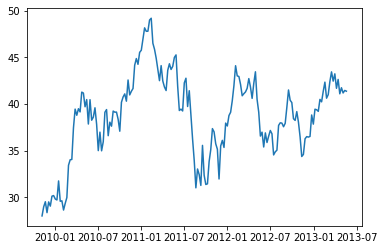

CCEP


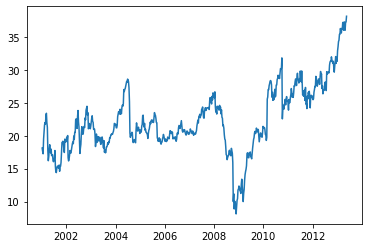

PG


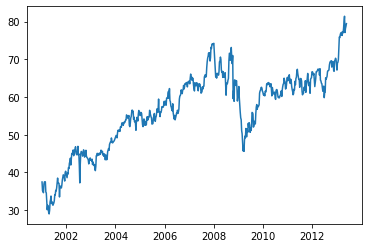

JNJ


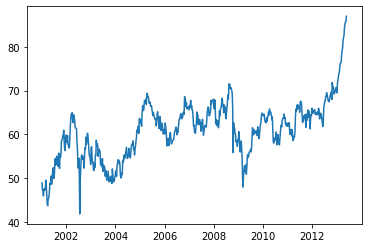

XOM


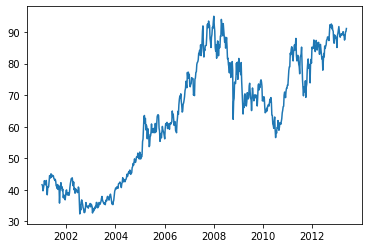

CVX


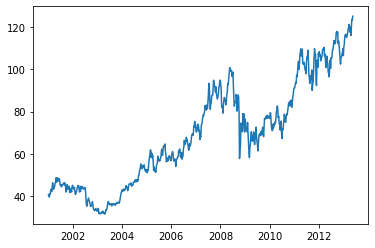

MRK


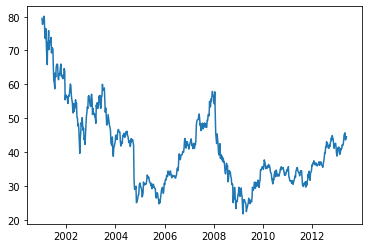

PFE


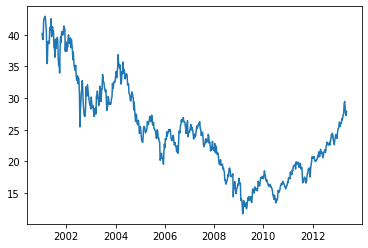

MCD


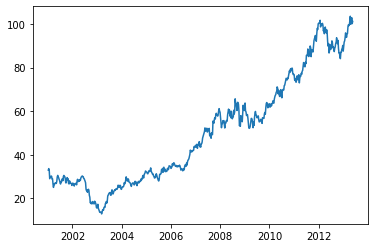

T


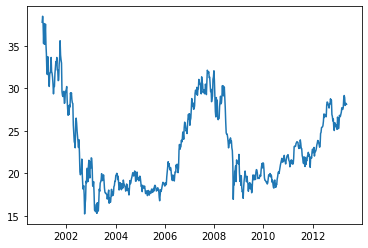

VZ


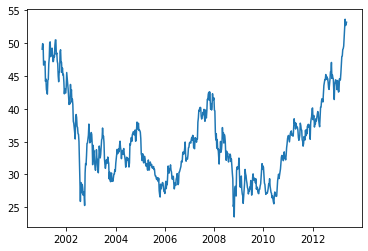

HPQ


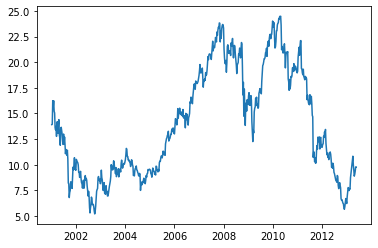

IBM


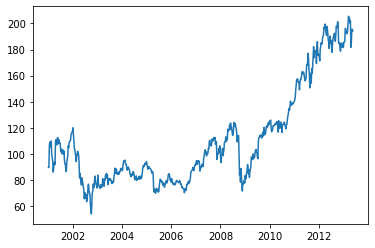

MSFT


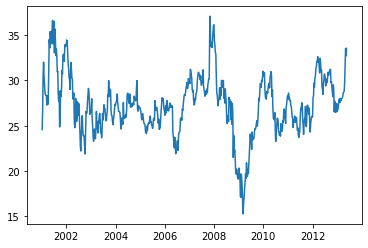

INTC


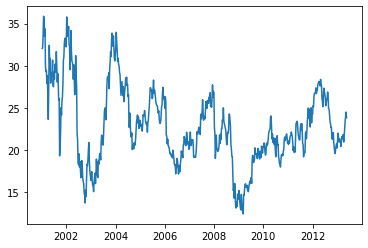

CRJ


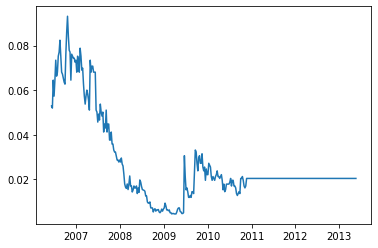

HD


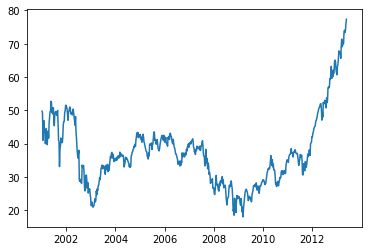

WMT


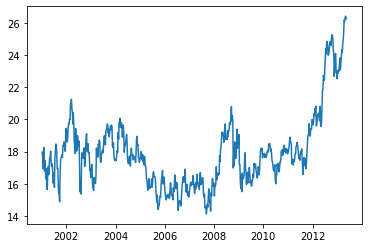

TRV


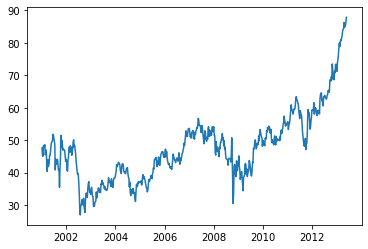

RTX


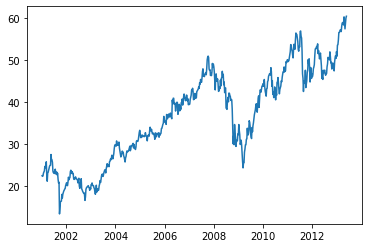

BA


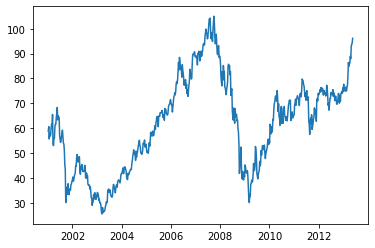

AA


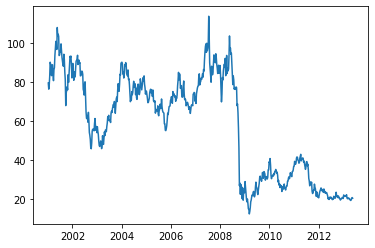

DD


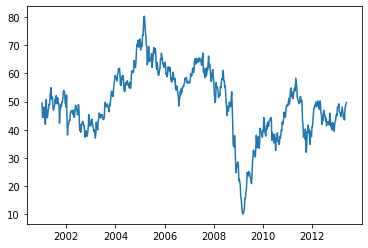

CAT


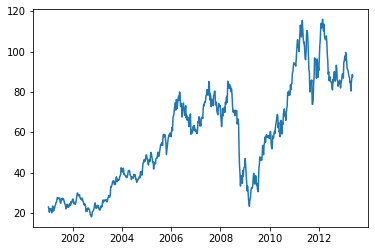

MMM


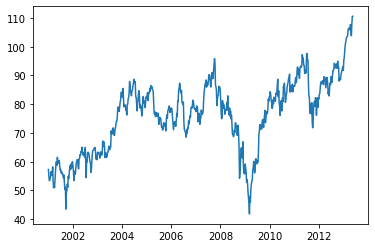

DIS


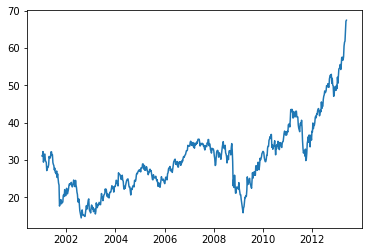

BOA


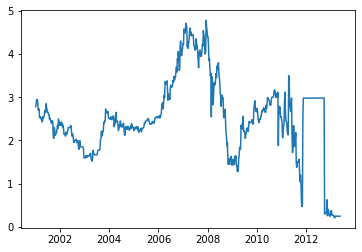

JPM


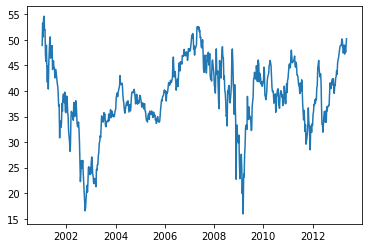

AXP


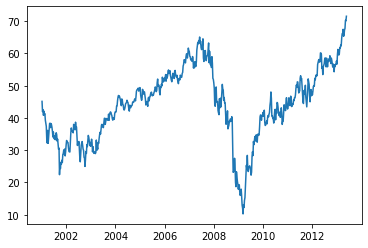

GE


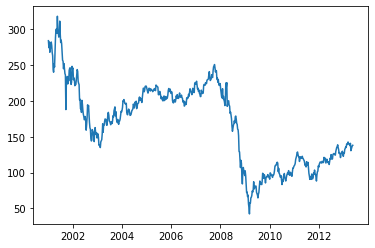

In [122]:
for i in custom_tickers:
    print(i)
    plt.plot(weekly_returns_dict[i].index,weekly_returns_dict[i]["close"])
    plt.show()

In [175]:
study_periods = [
    ('2001-01-02', '2004-01-06'),
    ('2004-01-06', '2007-01-02'),
    ('2007-01-02', '2010-01-05'),
    ('2010-01-05', '2013-05-14')
]

weekly_returns_dict = {}

for ticker, data in stock_data.items():
    data.index = pd.to_datetime(data.index)
    
    for period_num, (start_date, end_date) in enumerate(study_periods, start=1):
        period_data = data.loc[start_date:end_date]
        period_returns = calculate_weekly_returns(period_data)
        weekly_returns_dict.setdefault(ticker, {})[f'period_{period_num}'] = period_returns

In [176]:
period_dfs = {}

# Iterate over the periods
for period in ['period_1', 'period_2', 'period_3', 'period_4']:
    # Initialize an empty dictionary to store data for the current period
    period_data = {}
    
    # Iterate over each ticker's data
    for ticker, data in weekly_returns_dict.items():
        # Drop NaN values from the 'close' column for the current period
        close_prices = data[period][['returns']].dropna()
        period_data[ticker] = close_prices
    
    # Concatenate the data for all tickers into a single DataFrame for the current period
    period_df = pd.concat(period_data, axis=1)
    period_dfs[period] = period_df.dropna(axis=1)

correlation_matrices = {}

# Iterate over the periods
for period, period_df in period_dfs.items():
    # Calculate correlation matrix for the current period and store it in the dictionary
    correlation_matrices[period] = period_df.corr()


In [158]:
#period_dfs["period_1"]

In [177]:
correlation_matrices["period_1"].dropna()

,,CCEP,PG,JNJ,XOM,CVX,MRK,PFE,MCD,T,VZ,...,BA,AA,DD,CAT,MMM,DIS,BOA,JPM,AXP,GE
,,returns,returns,returns,returns,returns,returns,returns,returns,returns,returns,...,returns,returns,returns,returns,returns,returns,returns,returns,returns,returns
CCEP,returns,1.000000,0.291965,0.275835,0.305808,0.351182,0.077079,0.187008,0.067102,0.115896,0.211407,...,0.146301,0.244668,0.201670,0.165465,0.342498,0.223351,0.120937,0.259674,0.274886,0.269781
PG,returns,0.291965,1.000000,0.550325,0.455158,0.185381,0.281896,0.474383,0.198065,0.328079,0.170136,...,0.316151,0.254953,0.293873,0.250739,0.487590,0.245070,0.117519,0.107283,0.371976,0.414502
JNJ,returns,0.275835,0.550325,1.000000,0.530433,0.310492,0.500458,0.564459,0.145470,0.275274,0.205238,...,0.142561,0.195929,0.282010,0.345529,0.466366,0.220956,0.029182,0.147199,0.334189,0.415148
XOM,returns,0.305808,0.455158,0.530433,1.000000,0.724338,0.455461,0.532764,0.222550,0.286984,0.277284,...,0.447948,0.483874,0.476984,0.529997,0.626147,0.376198,0.166639,0.434206,0.561895,0.578695
CVX,returns,0.351182,0.185381,0.310492,0.724338,1.000000,0.382869,0.427996,0.287370,0.153772,0.245229,...,0.367572,0.459269,0.367951,0.495083,0.458580,0.323705,0.227305,0.501737,0.495385,0.450503
MRK,returns,0.077079,0.281896,0.500458,0.455461,0.382869,1.000000,0.641275,0.304955,0.334139,0.263051,...,0.278270,0.366592,0.326738,0.417517,0.348766,0.277947,0.069501,0.364838,0.394472,0.329828
PFE,returns,0.187008,0.474383,0.564459,0.532764,0.427996,0.641275,1.000000,0.251693,0.339940,0.242922,...,0.333441,0.413708,0.365976,0.414117,0.544934,0.299845,0.141981,0.355356,0.407330,0.424483
MCD,returns,0.067102,0.198065,0.145470,0.222550,0.287370,0.304955,0.251693,1.000000,0.229455,0.217104,...,0.320825,0.372278,0.181255,0.285888,0.261804,0.491130,0.257113,0.378740,0.343390,0.288607
T,returns,0.115896,0.328079,0.275274,0.286984,0.153772,0.334139,0.339940,0.229455,1.000000,0.598138,...,0.195075,0.305000,0.249814,0.228079,0.261872,0.261381,0.037359,0.267451,0.345128,0.431414


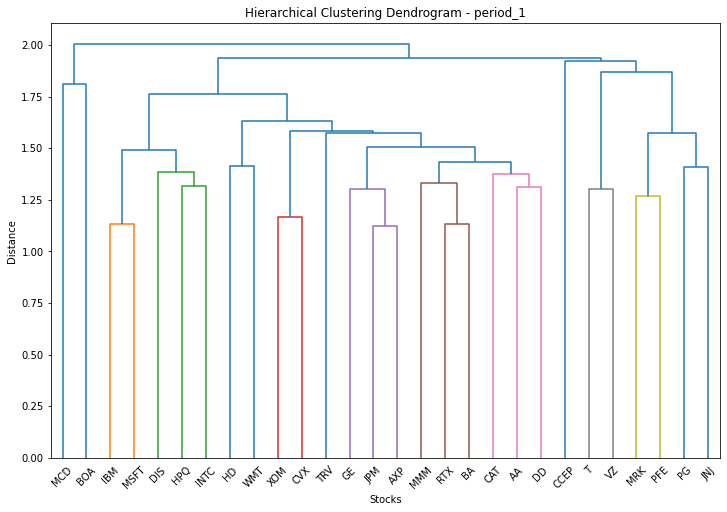

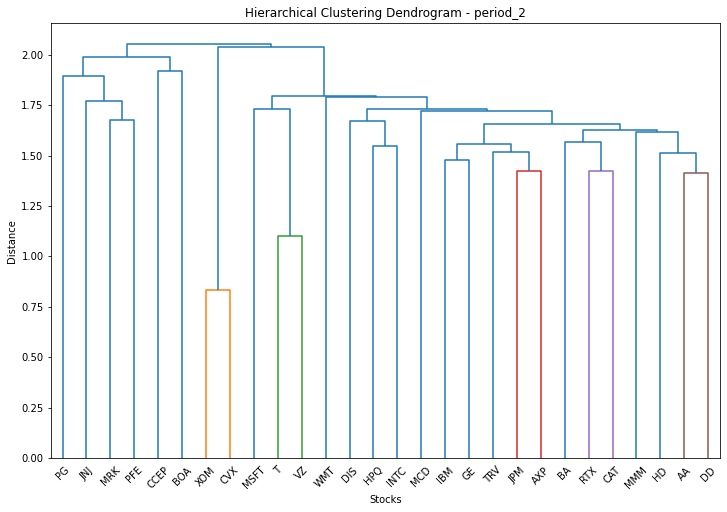

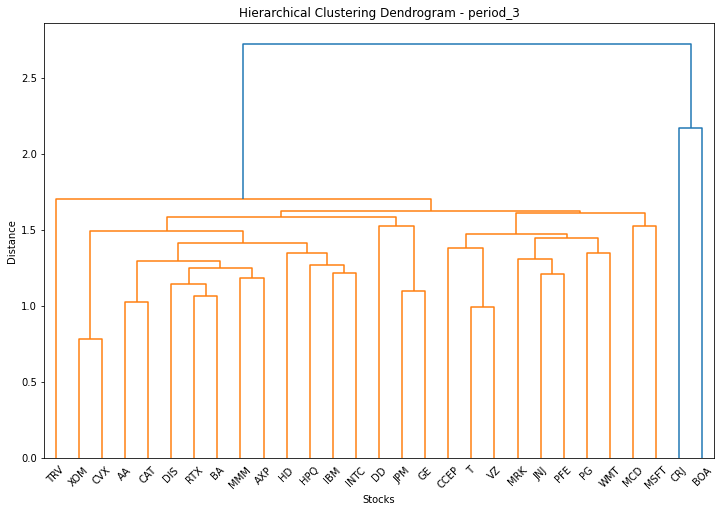

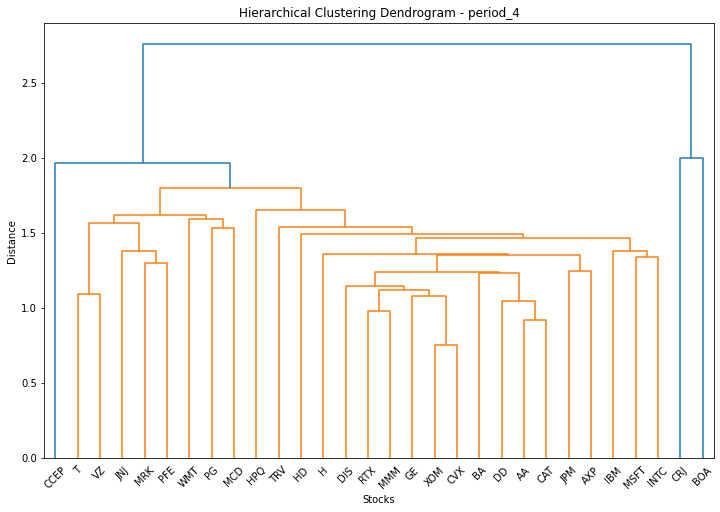

In [207]:
import numpy as np
from scipy.cluster.hierarchy import average, fcluster
import matplotlib.pyplot as plt

# Function to perform hierarchical clustering and print stocks in each cluster
def hierarchical_clustering(distance_matrix, labels, period):
    linkage_matrix = average(distance_matrix)
    labels = [label[0] for label in labels]

    # Set the figure size to be larger
    plt.figure(figsize=(12, 8))  # Adjust the size as needed

    # Plot the dendrogram
    dendrogram(average(distance_matrix), labels=labels, orientation='top')

    # Customize plot title and axis labels
    plt.title(f'Hierarchical Clustering Dendrogram - {period}')
    plt.xlabel('Stocks')
    plt.ylabel('Distance')

    # Create dictionary to store stocks in each cluster for 2, 4, and 8 clusters
    cluster_stocks = {num_clusters: {} for num_clusters in [2, 4, 8]}
    
    # Perform clustering to get cluster labels for 2, 4, and 8 clusters
    for num_clusters in [2, 4, 8]:
        cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
        
        # Assign stocks to clusters
        for stock, cluster_label in zip(labels, cluster_labels):
            if cluster_label not in cluster_stocks[num_clusters]:
                cluster_stocks[num_clusters][cluster_label] = [stock]
            else:
                cluster_stocks[num_clusters][cluster_label].append(stock)

    # Show the plot
    plt.show()
    
    return cluster_stocks

# Convert new correlation matrices to distance matrices using ultrametric function
distance_matrices = {}
for period, correlation_matrix in correlation_matrices.items():
    distance_matrices[period] = ultrametric(correlation_matrix)

# Create a dictionary to store cluster stocks for each period
all_cluster_stocks = {}

# Perform hierarchical clustering and plot dendrogram for each study period
for period, distance_matrix in distance_matrices.items():
    all_cluster_stocks[period] = hierarchical_clustering(distance_matrix.values, distance_matrix.index, period)


In [213]:
all_cluster_stocks

{'period_1': {2: {2: ['CCEP',
    'PG',
    'JNJ',
    'XOM',
    'CVX',
    'MRK',
    'PFE',
    'T',
    'VZ',
    'HPQ',
    'IBM',
    'MSFT',
    'INTC',
    'HD',
    'WMT',
    'TRV',
    'RTX',
    'BA',
    'AA',
    'DD',
    'CAT',
    'MMM',
    'DIS',
    'JPM',
    'AXP',
    'GE'],
   1: ['MCD', 'BOA']},
  4: {4: ['CCEP'],
   3: ['PG', 'JNJ', 'MRK', 'PFE', 'T', 'VZ'],
   2: ['XOM',
    'CVX',
    'HPQ',
    'IBM',
    'MSFT',
    'INTC',
    'HD',
    'WMT',
    'TRV',
    'RTX',
    'BA',
    'AA',
    'DD',
    'CAT',
    'MMM',
    'DIS',
    'JPM',
    'AXP',
    'GE'],
   1: ['MCD', 'BOA']},
  8: {8: ['CCEP'],
   7: ['PG', 'JNJ', 'MRK', 'PFE'],
   5: ['XOM',
    'CVX',
    'TRV',
    'RTX',
    'BA',
    'AA',
    'DD',
    'CAT',
    'MMM',
    'JPM',
    'AXP',
    'GE'],
   1: ['MCD'],
   6: ['T', 'VZ'],
   3: ['HPQ', 'IBM', 'MSFT', 'INTC', 'DIS'],
   4: ['HD', 'WMT'],
   2: ['BOA']}},
 'period_2': {2: {1: ['CCEP', 'PG', 'JNJ', 'MRK', 'PFE', 'BOA'],
   2: ['XOM'

In [ ]:
# RETURN CALCULATIONS

In [242]:
import pandas as pd
import numpy as np

def calculate_metrics_for_random_selection(period_dfs, num_stocks_list):
    results_by_period = {}
    num_portfolios = 1000
    
    for period, returns_data in period_dfs.items():
        returns_data = returns_data.droplevel(1, axis=1)
        results_by_stocks = {}
        
        for num_stocks in num_stocks_list:
            std_returns = []
            portfolio_returns = []
            
            for _ in range(1000):
                selected_stocks = np.random.choice(returns_data.columns, size=num_stocks, replace=False)
                
                portfolio_return = returns_data[selected_stocks].sum(axis=1).mean()
                portfolio_returns.append(portfolio_return)
                
                std_return = returns_data[selected_stocks].sum(axis=1).std()
                std_returns.append(std_return)
            
            average_std_return = np.mean(std_returns)
            sharpe_ratio = np.mean(portfolio_returns) / average_std_return if average_std_return != 0 else np.nan
            mean_return = np.mean(portfolio_returns)
            
            results_by_stocks[num_stocks] = {'Mean': mean_return, 'SD': average_std_return, 'Sharpe': sharpe_ratio}
        
        results_by_period[period] = results_by_stocks
    
    return results_by_period

num_stocks_list = [2, 4, 8]
results_by_period = calculate_metrics_for_random_selection(period_dfs, num_stocks_list)

dfs = []
for period, results_by_stocks in results_by_period.items():
    for num_stocks, metrics in results_by_stocks.items():
        df = pd.DataFrame(metrics, index=[f"{period} ({num_stocks} stocks)"])
        dfs.append(df)

result_df_random = pd.concat(dfs)
print(result_df)


                         Mean        SD    Sharpe
period_1 (2 stocks)  0.000063  0.068101  0.000919
period_1 (4 stocks)  0.001626  0.131375  0.012378
period_1 (8 stocks)  0.006920  0.243133  0.028462
period_2 (2 stocks)  0.002072  0.047381  0.043733
period_2 (4 stocks)  0.003537  0.075841  0.046633
period_2 (8 stocks)  0.009162  0.132188  0.069314
period_3 (2 stocks)  0.003134  0.121295  0.025840
period_3 (4 stocks)  0.003217  0.178248  0.018050
period_3 (8 stocks)  0.014449  0.386499  0.037385
period_4 (2 stocks)  0.003340  0.061312  0.054473
period_4 (4 stocks)  0.011155  0.147437  0.075660
period_4 (8 stocks)  0.021852  0.242045  0.090282


In [263]:
#CLUSTERS

import pandas as pd
import numpy as np

def calculate_metrics_for_all_clusters(all_cluster_stocks, period_dfs):
    results_by_period = {}
    
    for period, cluster_stocks in all_cluster_stocks.items():
        returns_data = period_dfs[period].droplevel(1, axis=1)
        results_by_cluster = {}
        
        for num_clusters, clusters in cluster_stocks.items():
            cluster_lists = list(clusters.values())
            std_returns = []
            portfolio_returns = []
            
            for _ in range(1000):
                returns = [returns_data[np.random.choice(cluster_list, size=1)[0]].mean() for cluster_list in cluster_lists]
                
                portfolio_return = np.mean(returns)
                portfolio_returns.append(portfolio_return)
                
                std_return = np.std(returns)
                std_returns.append(std_return)
            
            average_std_return = np.mean(std_returns)
            sharpe_ratio = np.mean(portfolio_returns) / average_std_return if average_std_return != 0 else np.nan
            mean_return = np.mean(portfolio_returns)
            
            results_by_cluster[num_clusters] = {'Mean': mean_return, 'SD': average_std_return, 'Sharpe': sharpe_ratio}
        
        results_by_period[period] = results_by_cluster
    
    return results_by_period

results_by_period = calculate_metrics_for_all_clusters(all_cluster_stocks, period_dfs)

dfs = []
for period, results_by_cluster in results_by_period.items():
    for num_clusters, metrics in results_by_cluster.items():
        df = pd.DataFrame(metrics, index=[f"{period} ({num_clusters} stocks)"])
        dfs.append(df)

result_df_clusters = pd.concat(dfs)
print(result_df)

                         Mean        SD    Sharpe
period_1 (2 stocks)  0.000063  0.068101  0.000919
period_1 (4 stocks)  0.001626  0.131375  0.012378
period_1 (8 stocks)  0.006920  0.243133  0.028462
period_2 (2 stocks)  0.002072  0.047381  0.043733
period_2 (4 stocks)  0.003537  0.075841  0.046633
period_2 (8 stocks)  0.009162  0.132188  0.069314
period_3 (2 stocks)  0.003134  0.121295  0.025840
period_3 (4 stocks)  0.003217  0.178248  0.018050
period_3 (8 stocks)  0.014449  0.386499  0.037385
period_4 (2 stocks)  0.003340  0.061312  0.054473
period_4 (4 stocks)  0.011155  0.147437  0.075660
period_4 (8 stocks)  0.021852  0.242045  0.090282


In [259]:
result_df_random

,Mean,SD,Sharpe
period_1 (2 stocks),0.001407,0.075105,0.018731
period_1 (4 stocks),0.002703,0.131147,0.020613
period_1 (8 stocks),0.005087,0.241130,0.021096
period_2 (2 stocks),0.003292,0.044055,0.074732
period_2 (4 stocks),0.006610,0.072468,0.091211
period_2 (8 stocks),0.012994,0.127811,0.101664
period_3 (2 stocks),0.002716,0.107574,0.025247
period_3 (4 stocks),0.006124,0.198580,0.030839
period_3 (8 stocks),0.012349,0.354411,0.034843
period_4 (2 stocks),0.005137,0.073068,0.070302


In [264]:
pd.concat([result_df_clusters,result_df_random],axis=1)

,Mean,SD,Sharpe,Mean,SD,Sharpe
period_1 (2 stocks),0.000168,0.000884,0.190340,0.001407,0.075105,0.018731
period_1 (4 stocks),0.000604,0.001581,0.381625,0.002703,0.131147,0.020613
period_1 (8 stocks),0.000254,0.001600,0.159028,0.005087,0.241130,0.021096
period_2 (2 stocks),0.001409,0.001050,1.341649,0.003292,0.044055,0.074732
period_2 (4 stocks),0.002068,0.001793,1.152897,0.006610,0.072468,0.091211
period_2 (8 stocks),0.001581,0.001799,0.879179,0.012994,0.127811,0.101664
period_3 (2 stocks),0.006092,0.006010,1.013702,0.002716,0.107574,0.025247
period_3 (4 stocks),0.006382,0.010410,0.613034,0.006124,0.198580,0.030839
period_3 (8 stocks),0.003782,0.007899,0.478852,0.012349,0.354411,0.034843
period_4 (2 stocks),0.005563,0.004445,1.251629,0.005137,0.073068,0.070302


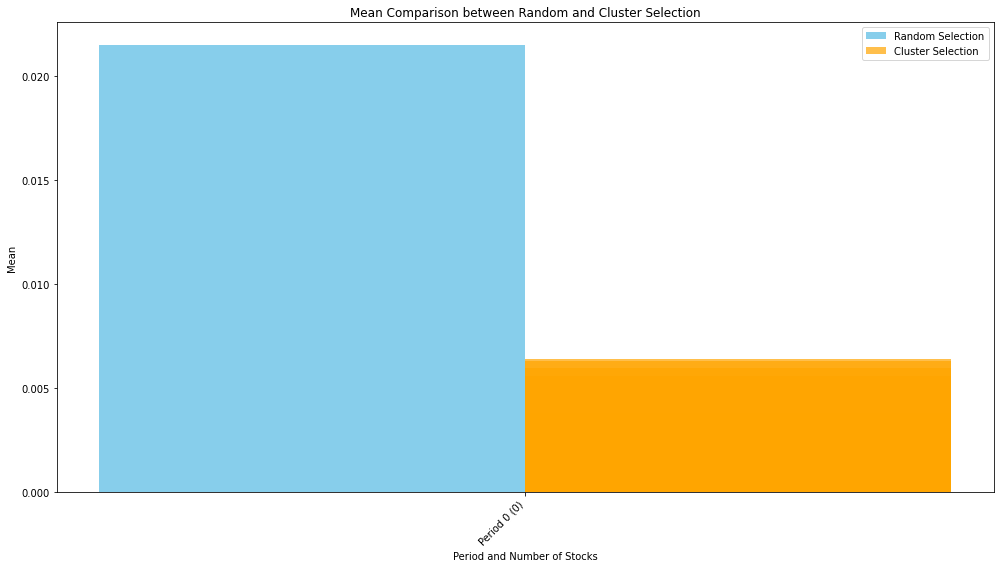

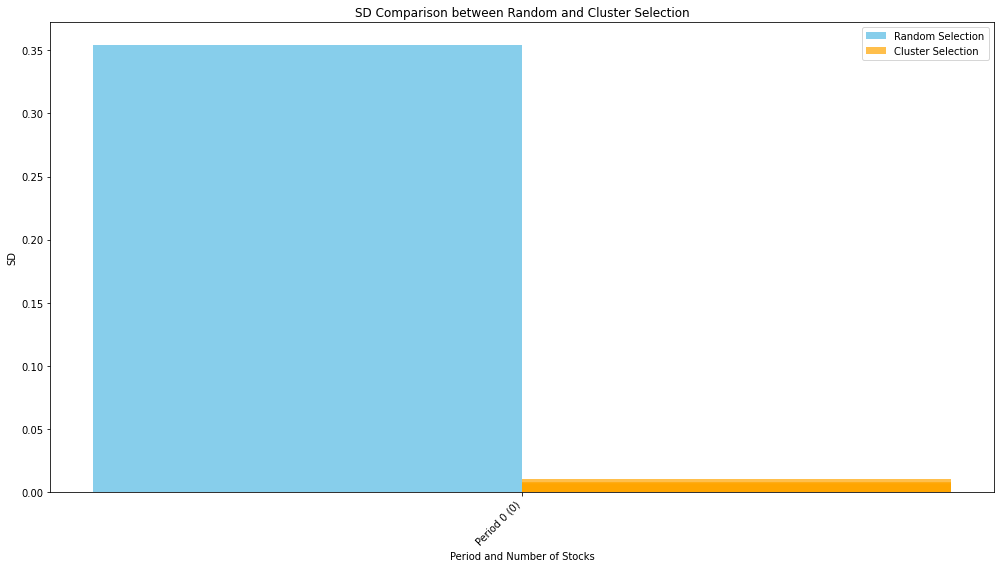

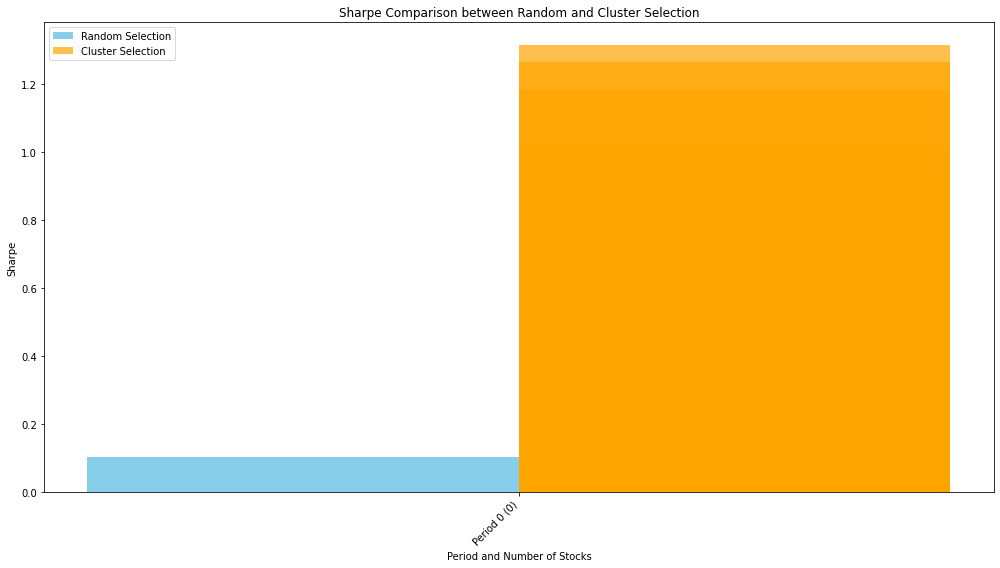

In [256]:
import matplotlib.pyplot as plt

# Function to plot bar graphs for each metric
import re

def plot_bar_graphs(df_random, df_clusters, metric_name):
    plt.figure(figsize=(14, 8))
    bar_width = 0.35
    
    # Split index to extract period and number of stocks
    periods_random = df_random.index.str.extract(r'period_(\d+)').astype(int)
    num_stocks_random = df_random.index.str.extract(r'\((\d+)').astype(int)
    
    periods_clusters = df_clusters.index.str.extract(r'period_(\d+)').astype(int)
    num_stocks_clusters = df_clusters.index.str.extract(r'\((\d+)').astype(int)
    
    # Combine period and number of stocks into index strings
    index_strings_random = [f'Period {period} ({num_stocks})' for period, num_stocks in zip(periods_random, num_stocks_random)]
    index_strings_clusters = [f'Period {period} ({num_stocks})' for period, num_stocks in zip(periods_clusters, num_stocks_clusters)]
    
    # Calculate the position for each bar group
    positions_random = np.arange(len(index_strings_random))
    positions_clusters = np.arange(len(index_strings_clusters))
    
    # Plot random selection data
    plt.bar(positions_random - bar_width/2, df_random[metric_name], label='Random Selection', width=bar_width, color='skyblue')
    
    # Plot cluster selection data
    plt.bar(positions_clusters + bar_width/2, df_clusters[metric_name], label='Cluster Selection', width=bar_width, color='orange', alpha=0.7)
    
    plt.xlabel('Period and Number of Stocks')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} Comparison between Random and Cluster Selection')
    
    # Set xticks and labels
    plt.xticks(np.arange(len(index_strings_random)), index_strings_random, rotation=45, ha='right')
    
    plt.legend()
    plt.tight_layout()
    plt.show()



# Example DataFrames
# result_df_random and result_df_clusters are assumed to be defined already

# Plot bar graphs for Mean, SD, and Sharpe
plot_bar_graphs(result_df_random, result_df_clusters, 'Mean')
plot_bar_graphs(result_df_random, result_df_clusters, 'SD')
plot_bar_graphs(result_df_random, result_df_clusters, 'Sharpe')
